In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/kaggle/input/email-spam-classification-dataset-csv/emails.csv', sep=',')
df.sample(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
3682,Email 3683,0,3,2,0,3,0,19,0,0,...,0,0,0,0,0,0,0,0,0,0
3506,Email 3507,1,4,2,0,1,0,9,0,0,...,0,0,0,0,0,0,0,1,0,0
2621,Email 2622,0,2,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1430,Email 1431,2,18,1,4,2,6,53,6,1,...,0,0,0,0,0,0,0,1,0,0
1854,Email 1855,10,14,7,8,11,6,115,7,1,...,0,0,0,0,0,0,0,4,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [4]:
df.isnull().sum().value_counts()

0    3002
dtype: int64

In [5]:
df = df.drop('Email No.', axis=1)
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


<Axes: ylabel='Frequency'>

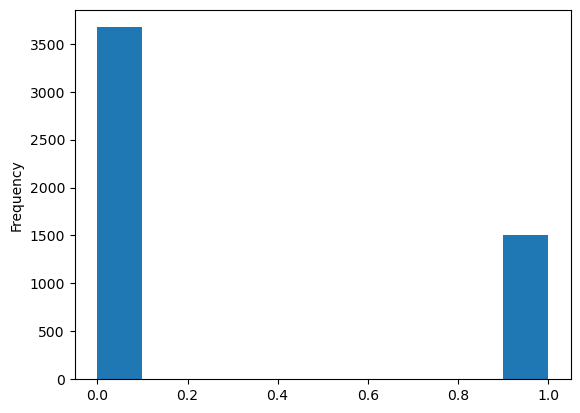

In [6]:
import matplotlib.pyplot as plt
df.Prediction.plot.hist()

In [7]:
df.dtypes

the           int64
to            int64
ect           int64
and           int64
for           int64
              ...  
military      int64
allowing      int64
ff            int64
dry           int64
Prediction    int64
Length: 3001, dtype: object

In [8]:
X_raw = df.iloc[:, :-1]
y = df.iloc[:, -1:]

In [9]:
X_raw

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [10]:
y

,Prediction
0,0
1,0
2,0
3,0
4,0
...,...
5167,0
5168,0
5169,1
5170,1


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X_raw)
print(f"Max : {X.max()} &  Min : {X.min()}")

Max : 1.0 &  Min : 0.0


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 52)

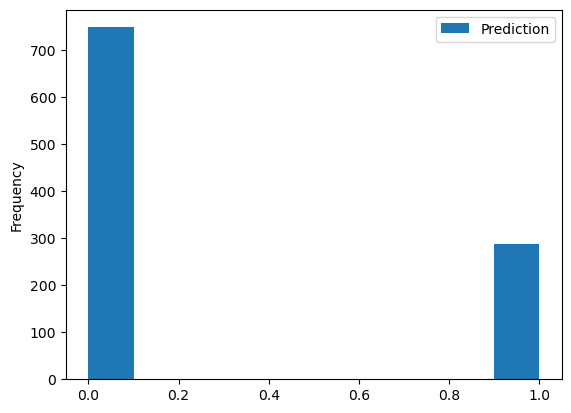

In [13]:
y_test.plot.hist()
plt.show()

In [14]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Training dataset shape, X_train: (4137, 3000), y_train: (4137, 1)
Testing dataset shape, X_test: (1035, 3000), y_test: (1035, 1)


In [15]:
from sklearn.metrics import *

def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall.mean()
    results_pos['precision'] = precision.mean()
    results_pos['f1score'] = f_beta.mean()
    return results_pos

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

evaluate_metrics(y_test, y_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'accuracy': 0.9642512077294686,
 'recall': 0.9505720248187968,
 'precision': 0.9596285983102554,
 'f1score': 0.9549642783641549}

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

evaluate_metrics(y_test, y_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'accuracy': 0.8531400966183574,
 'recall': 0.8822900557118635,
 'precision': 0.8205375067373863,
 'f1score': 0.8354916428248758}

In [21]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

evaluate_metrics(y_test, y_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'accuracy': 0.9526570048309179,
 'recall': 0.9275186793120795,
 'precision': 0.9531665070163831,
 'f1score': 0.9392655823929468}

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

evaluate_metrics(y_test, y_pred)

/tmp/ipykernel_32/3883761238.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


{'accuracy': 0.9739130434782609,
 'recall': 0.9690673386871378,
 'precision': 0.966084239759315,
 'f1score': 0.9675609226651003}

In [24]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

evaluate_metrics(y_test, y_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'accuracy': 0.9671497584541063,
 'recall': 0.9600933499785724,
 'precision': 0.9581342708980769,
 'f1score': 0.9591072623828648}

In [25]:
from xgboost import XGBClassifier

model =XGBClassifier(eval_metric='mlogloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

evaluate_metrics(y_test, y_pred)

{'accuracy': 0.978743961352657,
 'recall': 0.9788518511617508,
 'precision': 0.9689989324135666,
 'f1score': 0.9737619609506074}

In [26]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

evaluate_metrics(y_test, y_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'accuracy': 0.9526570048309179,
 'recall': 0.9436243455253498,
 'precision': 0.9389622780655985,
 'f1score': 0.9412537400569219}

Final Model

In [27]:
from xgboost import XGBClassifier
import pickle

model =XGBClassifier(eval_metric='mlogloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

evaluate_metrics(y_test, y_pred)
pickle.dump(model, open('XGBModel.pkl', 'wb'))

In [28]:
features = df.columns.tolist()
pickle.dump(features, open('features.pkl', 'wb'))

In [29]:
len(df.columns)

3001